**기본 세팅**

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

mpl.rc('font', family='NanumGothic') # 폰트 설정
mpl.rc('axes', unicode_minus=False) # 유니코드에서 음수 부호 설정

# 차트 스타일 설정
sns.set(font="NanumGothic", rc={"axes.unicode_minus":False}, style='darkgrid')
plt.rc("figure", figsize=(10,8))

warnings.filterwarnings("ignore")

---

# 5. NMF(Non-Negative Matrix Factorization)

NMF는 Truncated SVD 방식처럼 낮은 랭크를 통한 행렬 근사 방식의 변형이다.

원본 행렬 내의 모든 원소가 0 이상의 양수일 때 두 개의 양수 행렬로 분해가능하다.

예시로 4 X 6 행렬$A$가 있다면 4 X 2 행렬 $W$와 2 X 6 행렬 $H$로 분해한다.

$$
A = WH
$$

- W: 원본 행에 대한 잠재 요소를 특성으로 가진다.


- H: 원본 열에 대한 잠재 요소를 특성으로 가진다.

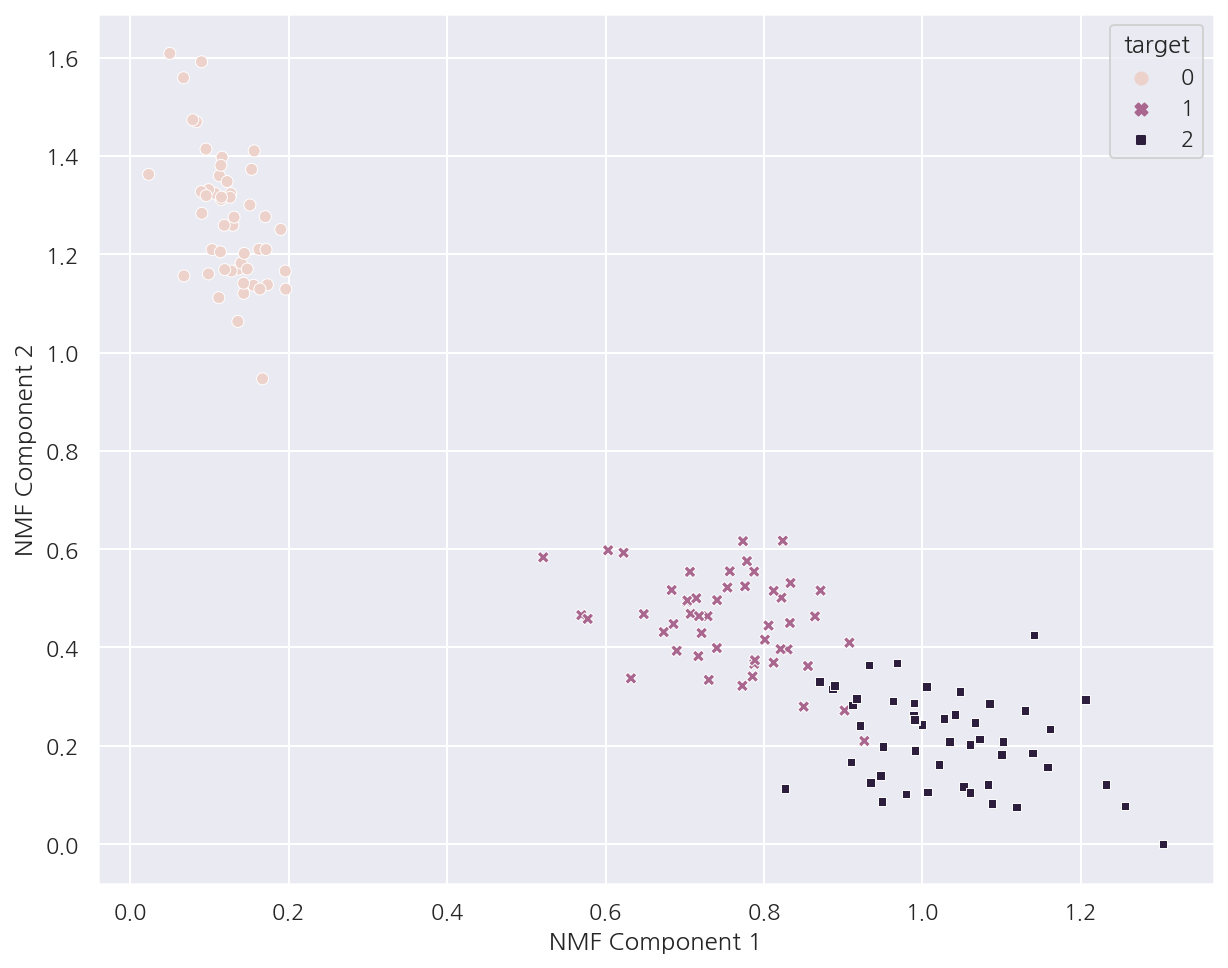

In [4]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris

iris = load_iris()
iris_ftrs = iris.data

# NMF 변환
nmf = NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)

# 데이터 프레임 생성
iris_df = pd.DataFrame(iris_nmf, columns = ["NMF_C1", "NMF_C2"])
iris_df["target"] = iris.target

# NMF 컴포넌트 시각화
sns.scatterplot(x="NMF_C1", y="NMF_C2", data=iris_df, 
                hue= "target", style = "target")

plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')

plt.show()